In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
features = [
    "GrLivArea",       
    "TotalBsmtSF",     
    "1stFlrSF",        
    "2ndFlrSF",       
    "FullBath",        
    "HalfBath",        
    "BsmtFullBath",    
    "BsmtHalfBath",    
    "BedroomAbvGr"     
]
target = "SalePrice"
X_train = train[features].copy()
y_train = train[target].copy()
X_test = test[features].copy()

In [4]:
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=features)
X_test = pd.DataFrame(imputer.transform(X_test), columns=features)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
train_predictions = model.predict(X_train)
r2 = r2_score(y_train, train_predictions)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print(f"Training R² Score: {r2:.4f}")
print(f"Training RMSE: {rmse:.2f}")

Training R² Score: 0.6789
Training RMSE: 45000.66


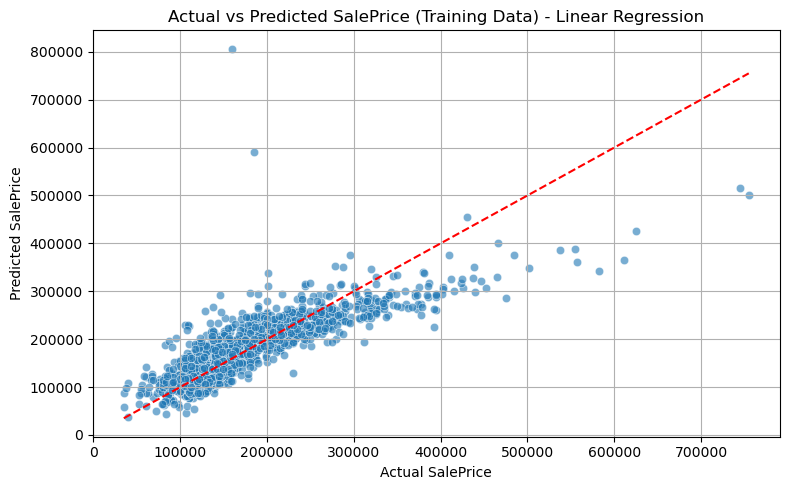

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train, y=train_predictions, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice (Training Data) - Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

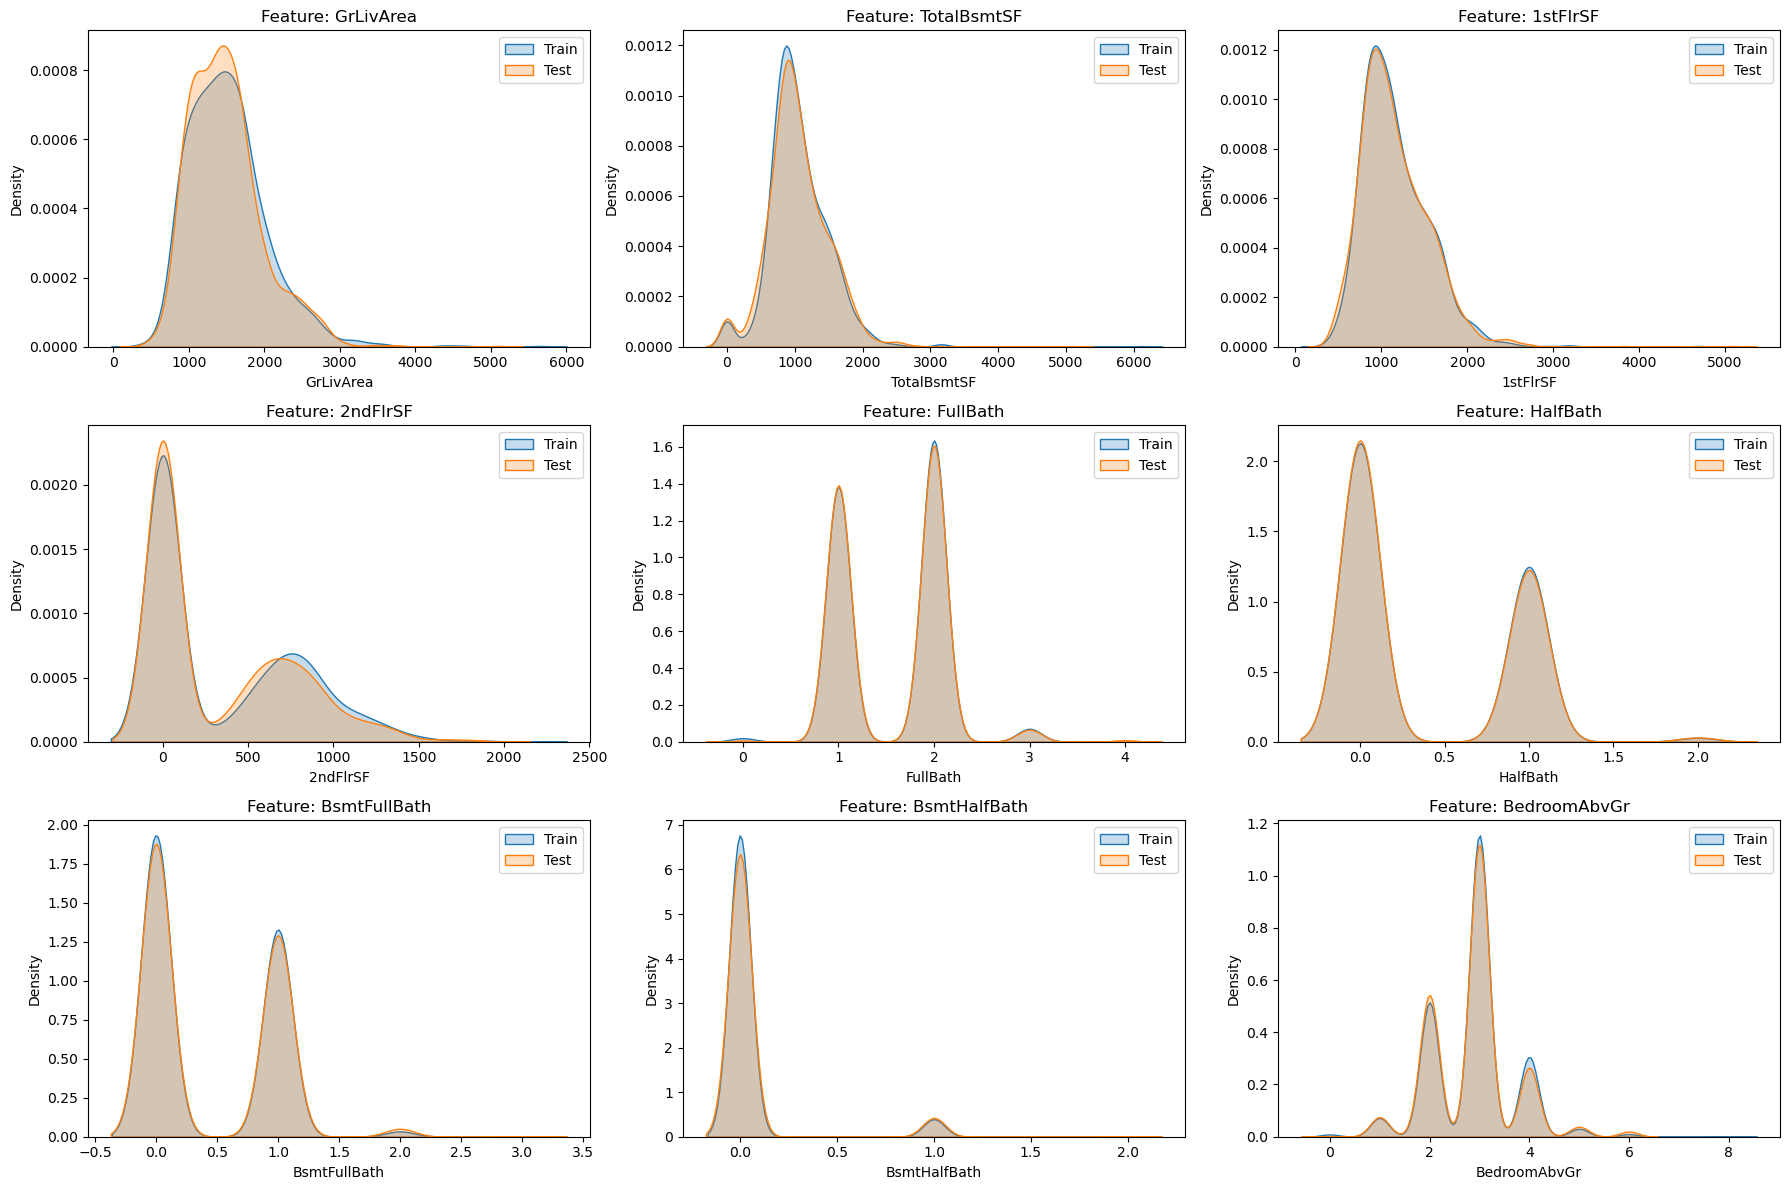

In [8]:
num_features = len(features)
cols = 3
rows = (num_features + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()  
for i, feature in enumerate(features):
    sns.kdeplot(train[feature], label='Train', fill=True, ax=axes[i])
    sns.kdeplot(test[feature], label='Test', fill=True, ax=axes[i])
    axes[i].set_title(f"Feature: {feature}")
    axes[i].set_xlabel(feature)
    axes[i].legend()
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [9]:
test_predictions = model.predict(X_test)
test_results = X_test.copy()
test_results['PredictedSalePrice'] = test_predictions
print("Predicted Sales of First Ten Houses")
test_results.head(10)

Predicted Sales of First Ten Houses


,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,PredictedSalePrice
0,896.0,882.0,896.0,0.0,1.0,0.0,0.0,0.0,2.0,109056.084690
1,1329.0,1329.0,1329.0,0.0,1.0,1.0,0.0,0.0,3.0,166983.671205
2,1629.0,928.0,928.0,701.0,2.0,1.0,0.0,0.0,3.0,196414.889023
3,1604.0,926.0,926.0,678.0,2.0,1.0,0.0,0.0,3.0,194508.344384
4,1280.0,1280.0,1280.0,0.0,2.0,0.0,0.0,0.0,2.0,190794.953080
5,1655.0,763.0,763.0,892.0,2.0,1.0,0.0,0.0,3.0,188693.352039
6,1187.0,1168.0,1187.0,0.0,2.0,0.0,1.0,0.0,3.0,176523.635715
7,1465.0,789.0,789.0,676.0,2.0,1.0,0.0,0.0,3.0,176596.591886
8,1341.0,1300.0,1341.0,0.0,1.0,1.0,1.0,0.0,2.0,200903.847372
9,882.0,882.0,882.0,0.0,1.0,0.0,1.0,0.0,2.0,124509.911544


In [10]:
example_house = {
    "GrLivArea": 2000,
    "TotalBsmtSF": 900,
    "1stFlrSF": 1000,
    "2ndFlrSF": 1000,
    "FullBath": 2,
    "HalfBath": 1,
    "BsmtFullBath": 1,
    "BsmtHalfBath": 0,
    "BedroomAbvGr": 3
}
example_df = pd.DataFrame([example_house])
example_df = pd.DataFrame(imputer.transform(example_df), columns=features)
predicted_price = model.predict(example_df)[0]
print(f"🏠 Predicted Sale Price for the example house: ${predicted_price:,.2f}")

🏠 Predicted Sale Price for the example house: $238,755.27
